In [1]:
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from tqdm import tqdm 
from collections import defaultdict
import sr_processing as sr
import plot_utils as plu

In [2]:
class hu_RFmapping:
    def __init__(self,main_path):
        self.main_path = main_path
        self.df_data = pd.read_pickle(os.path.join(main_path,'data.pkl'))
        self.df_epochs = pd.read_pickle(os.path.join(main_path,'epochs.pkl'))
        self.vis_epochs = [i for i in self.df_epochs['stim_name'] if 'RFMapping' in i]
        self.cell_labels = self.df_data.cell_type.values
        self.region_labels = self.df_data.region.values
        self.layer_labels = self.df_data.layer.values
    def load_data(self):
        self.epoch_paths = [os.path.join(self.main_path,ep) for ep in self.vis_epochs ]
        self.trial_info = {ep: pd.read_csv(os.path.join(ep_path,'trial_info.csv')) for
                         ep,ep_path in zip(self.vis_epochs ,self.epoch_paths)}
        self.trial_dic = {ep: sr.get_index_maps(self.trial_info[ep]) for ep in
                         self.vis_epochs}
        self.trial_data = {ep:sr.load_pickle(os.path.join(ep_path,'firing_rates.pkl'))
                           for ep,ep_path in zip(self.vis_epochs ,self.epoch_paths)}
        return
    def get_vis_epochs_keys(self):
        e_k_length = []
        for epoch in self.vis_epochs:
            k_s1 = list(test_session.trial_dic[epoch].keys())
            e_k_length.append(len(set(k_s1)))
        if len(set(e_k_length)) == 1:
            self.trial_type_keys = k_s1
        else:
            print('Trial types do not match across trials')
#    def load_trial(self, )

In [3]:
session_path = '/scratch/ecephys_714527_2024-05-15_13-00-23_nwb_2025-08-03_21-11-22/'
test_session = hu_RFmapping(session_path)
test_session.load_data()
test_session.get_vis_epochs_keys()

In [ ]:
test_session

In [7]:
# allen brain atlas
# root unknown
# cingulum bundle (cing); MEDIAL FOREBRAIN BUNDLE SYSTEM
# Primary somatosensory area (SSp)
# Secondary motor area (MOs)
# dorsal hippocampal commissure (dhc)
# LATERAL FOREBRAIN BUNDLE SYSTEM
# posterior forceps (fp)
#np.unique(test_session.region_labels)

100%|██████████| 193/193 [00:22<00:00, 39.12it/s]

In [12]:
np.unique(test_session.region_labels)

array(['MOs', 'RSPd', 'SSp', 'VISp', 'cing', 'dhc', 'fp', 'root'],
      dtype=object)

In [13]:
epochs = ['Pre_Injection','Post_Injectipon_Early','Pre_Injection_late']

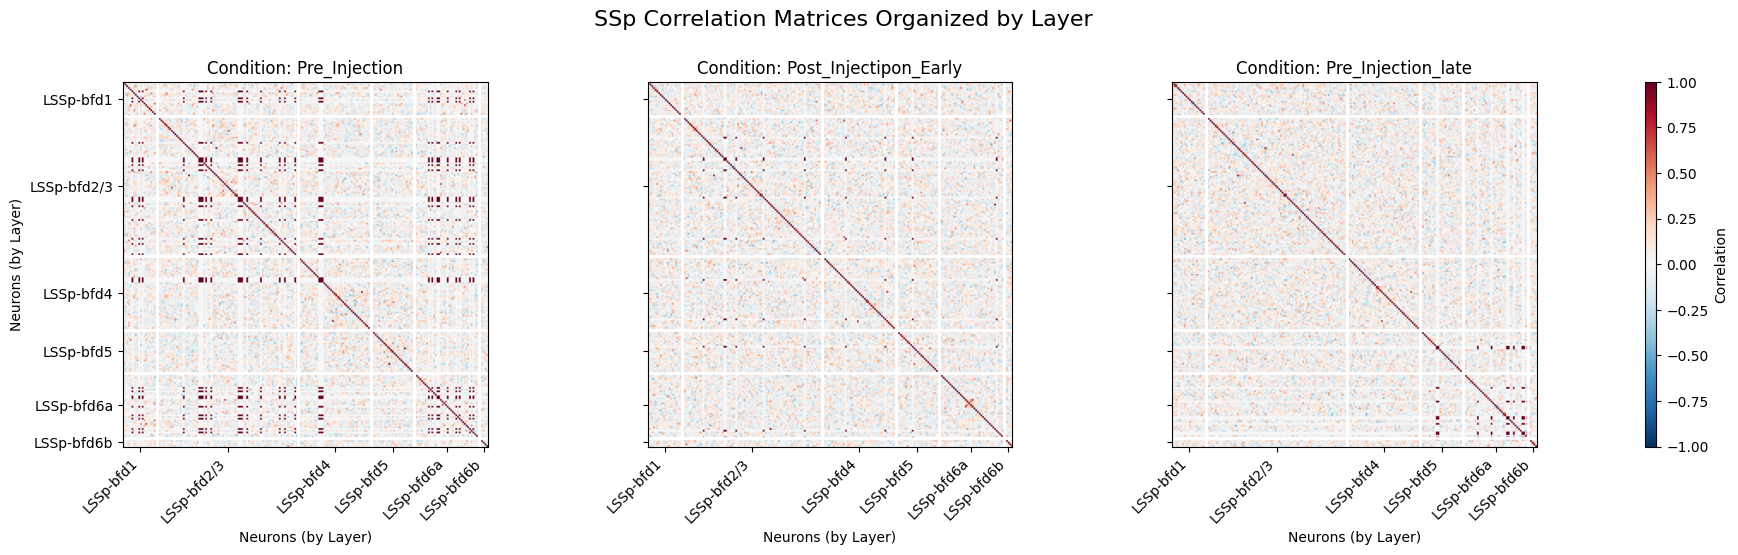

In [23]:
reg = "SSp"
matrices = []
for vis_epoch in test_session.vis_epochs:
    fr_rates = test_session.trial_data[vis_epoch][(7777,7777,7777)]
    test_sub = sr.subset_and_organize_matrices(test_session.region_labels, test_session.layer_labels, fr_rates,reg)
    v = sr.add_epsilon(test_sub[0], epsilon=1e-7)
    correlation_matrix = np.corrcoef(v)
    matrices.append(correlation_matrix)
layer_info = test_sub[2]
unique_layers = sorted(layer_info.keys())
plu.generate_matrices_comparison(matrices,layer_info,unique_layers,epochs,title = reg)
### cell type width 


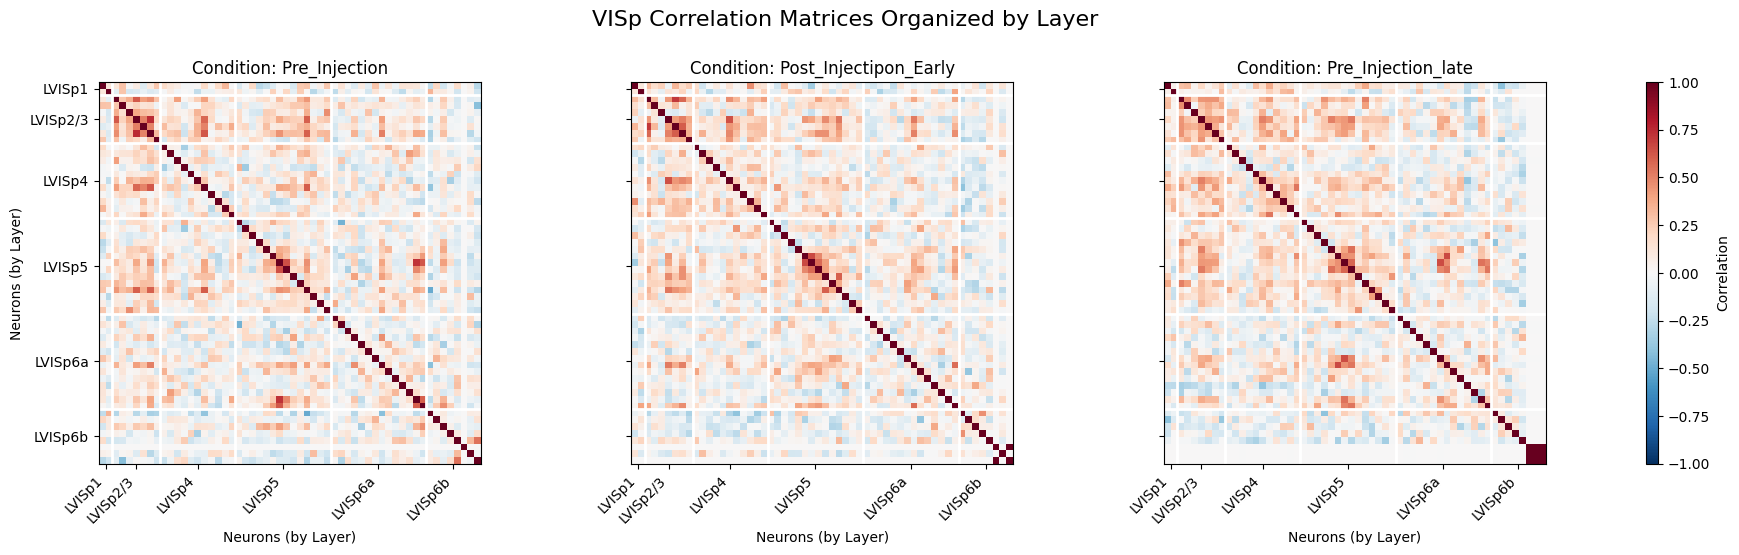

In [24]:
reg = "VISp"
matrices = []
for vis_epoch in  test_session.vis_epochs:
    fr_rates = test_session.trial_data[vis_epoch][(7777,7777,7777)]
    test_sub = sr.subset_and_organize_matrices(test_session.region_labels, test_session.layer_labels, fr_rates,reg)
    v = sr.add_epsilon(test_sub[0], epsilon=1e-7)
    correlation_matrix = np.corrcoef(v)
    matrices.append(correlation_matrix)
layer_info = test_sub[2]
unique_layers = sorted(layer_info.keys())
plu.generate_matrices_comparison(matrices,layer_info,unique_layers,epochs,title = reg)

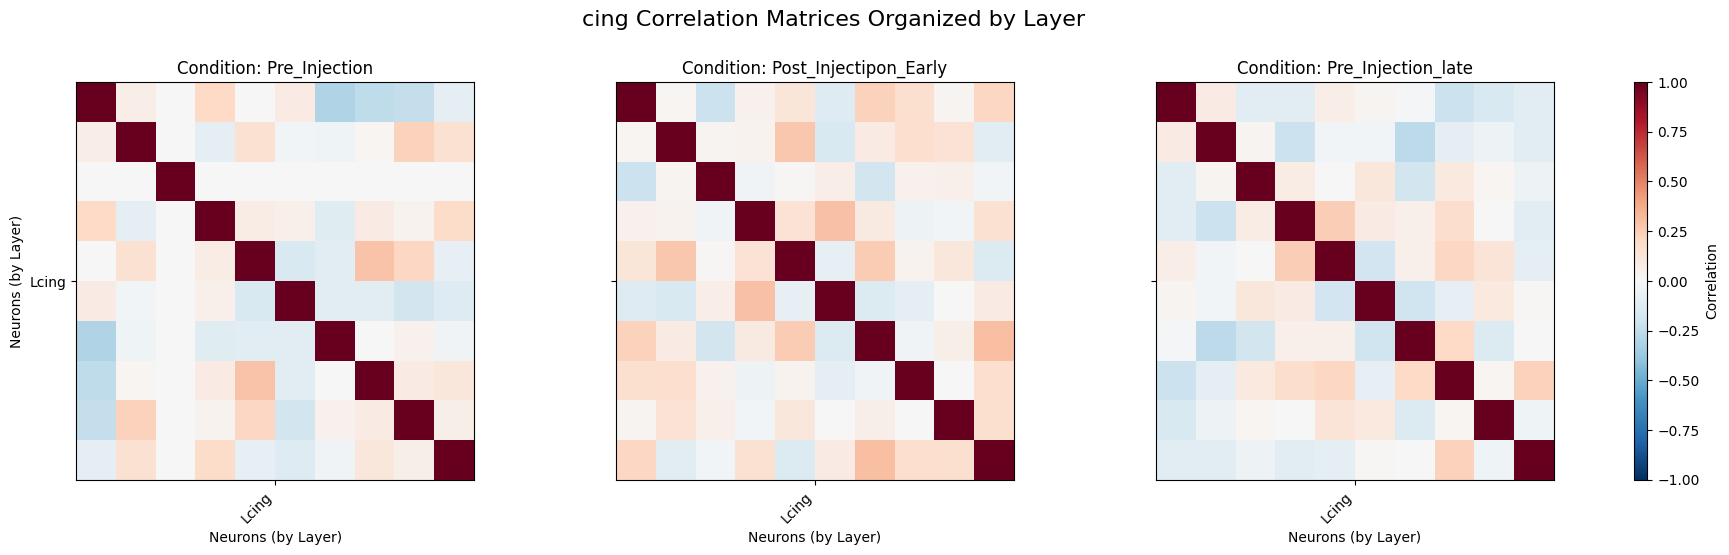

In [25]:
reg = "cing"
matrices = []
for vis_epoch in  test_session.vis_epochs:
    fr_rates = test_session.trial_data[vis_epoch][(7777,7777,7777)]
    test_sub = sr.subset_and_organize_matrices(test_session.region_labels, test_session.layer_labels, fr_rates,reg)
    v = sr.add_epsilon(test_sub[0], epsilon=1e-7)
    correlation_matrix = np.corrcoef(v)
    matrices.append(correlation_matrix)
layer_info = test_sub[2]
unique_layers = sorted(layer_info.keys())
plu.generate_matrices_comparison(matrices,layer_info,unique_layers,epochs,title = reg)

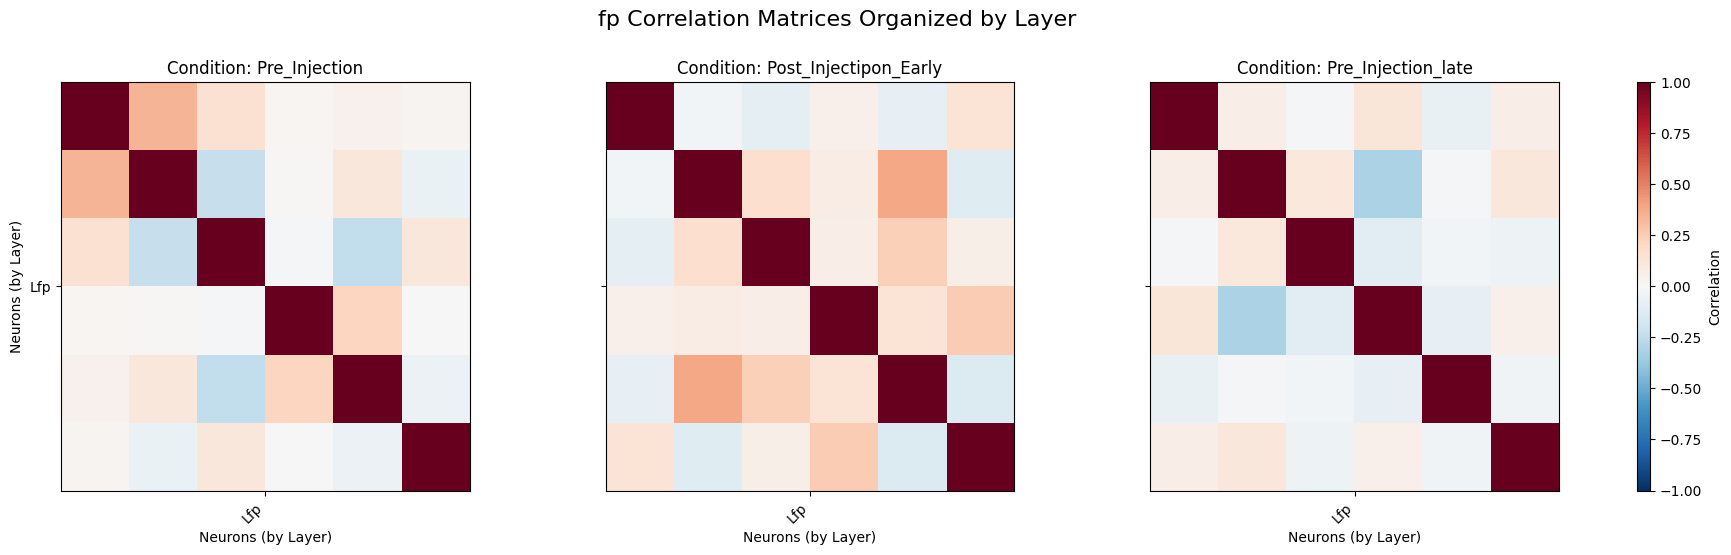

In [26]:
reg = "fp"
matrices = []
for vis_epoch in test_session.vis_epochs:
    fr_rates = test_session.trial_data[vis_epoch][(7777,7777,7777)]
    test_sub = sr.subset_and_organize_matrices(test_session.region_labels, test_session.layer_labels, fr_rates,reg)
    v = sr.add_epsilon(test_sub[0], epsilon=1e-7)
    correlation_matrix = np.corrcoef(v)
    matrices.append(correlation_matrix)
layer_info = test_sub[2]
unique_layers = sorted(layer_info.keys())
plu.generate_matrices_comparison(matrices,layer_info,unique_layers,epochs,title = reg)

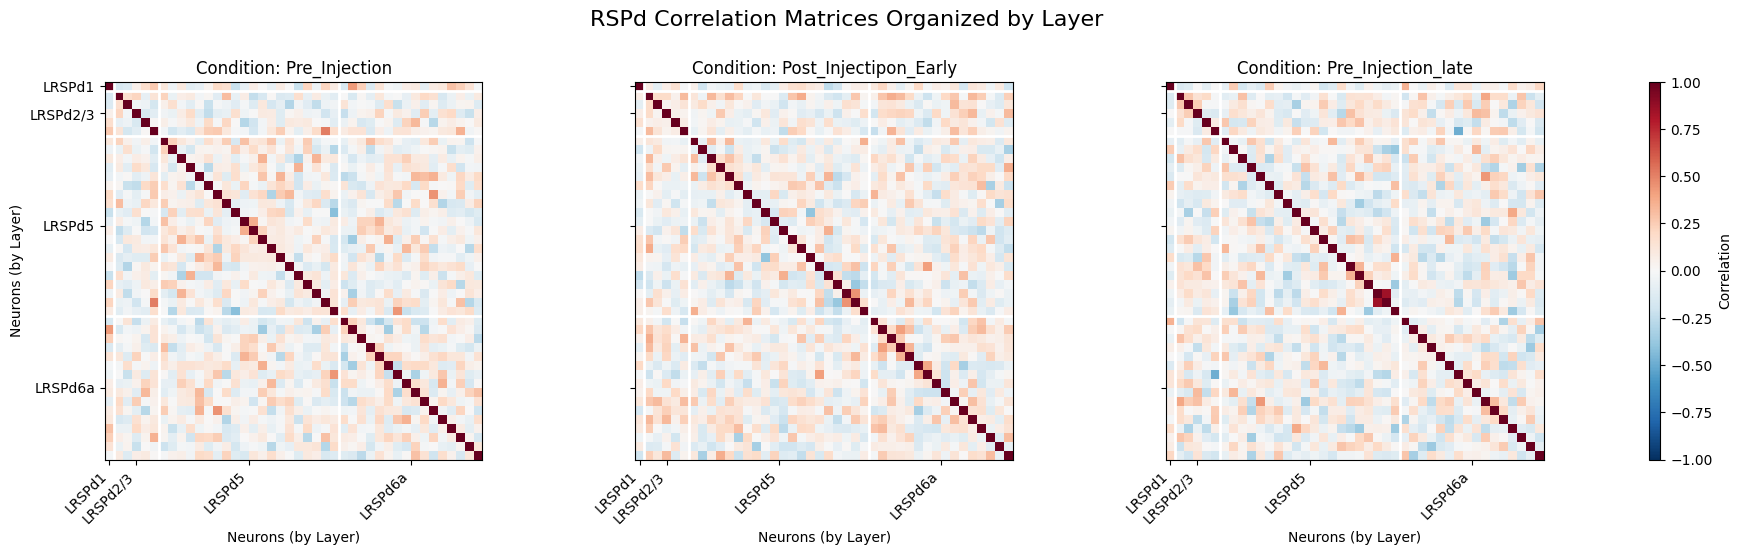

In [27]:
reg = 'RSPd'
matrices = []
for vis_epoch in test_session.vis_epochs:
    fr_rates = test_session.trial_data[vis_epoch][(7777,7777,7777)]
    test_sub = sr.subset_and_organize_matrices(test_session.region_labels, test_session.layer_labels, fr_rates,reg)
    v = sr.add_epsilon(test_sub[0], epsilon=1e-7)
    correlation_matrix = np.corrcoef(v)
    matrices.append(correlation_matrix)
layer_info = test_sub[2]
unique_layers = sorted(layer_info.keys())
plu.generate_matrices_comparison(matrices,layer_info,unique_layers,epochs,title = reg)

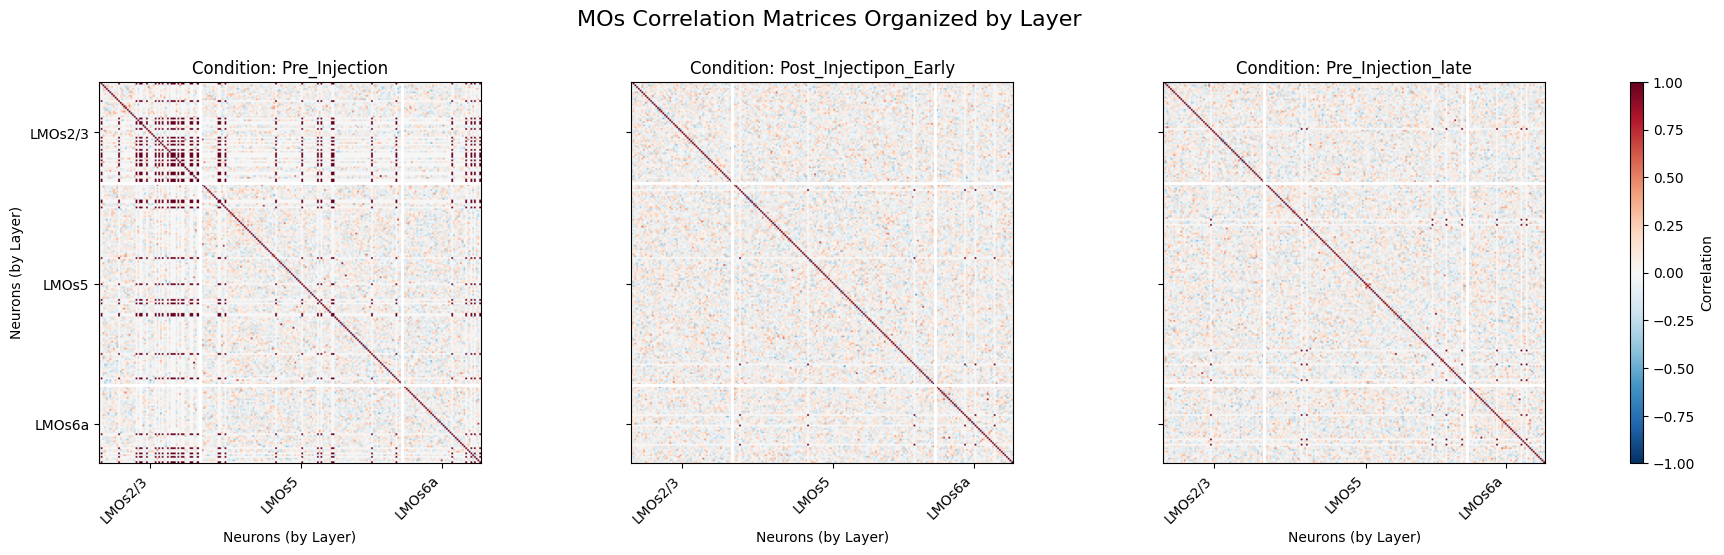

In [28]:
reg = 'MOs'
matrices = []
for vis_epoch in test_session.vis_epochs:
    fr_rates = test_session.trial_data[vis_epoch][(7777,7777,7777)]
    test_sub = sr.subset_and_organize_matrices(test_session.region_labels, test_session.layer_labels, fr_rates,reg)
    v = sr.add_epsilon(test_sub[0], epsilon=1e-7)
    correlation_matrix = np.corrcoef(v)
    matrices.append(correlation_matrix)
layer_info = test_sub[2]
unique_layers = sorted(layer_info.keys())
plu.generate_matrices_comparison(matrices,layer_info,unique_layers,epochs,title = reg)

In [29]:
session_path = '/scratch/ecephys_714527_2024-05-14_13-22-07_nwb_2025-08-03_21-11-22/'
test_session = hu_RFmapping(session_path)
test_session.load_data()
test_session.get_vis_epochs_keys()

IndexError: list index out of range

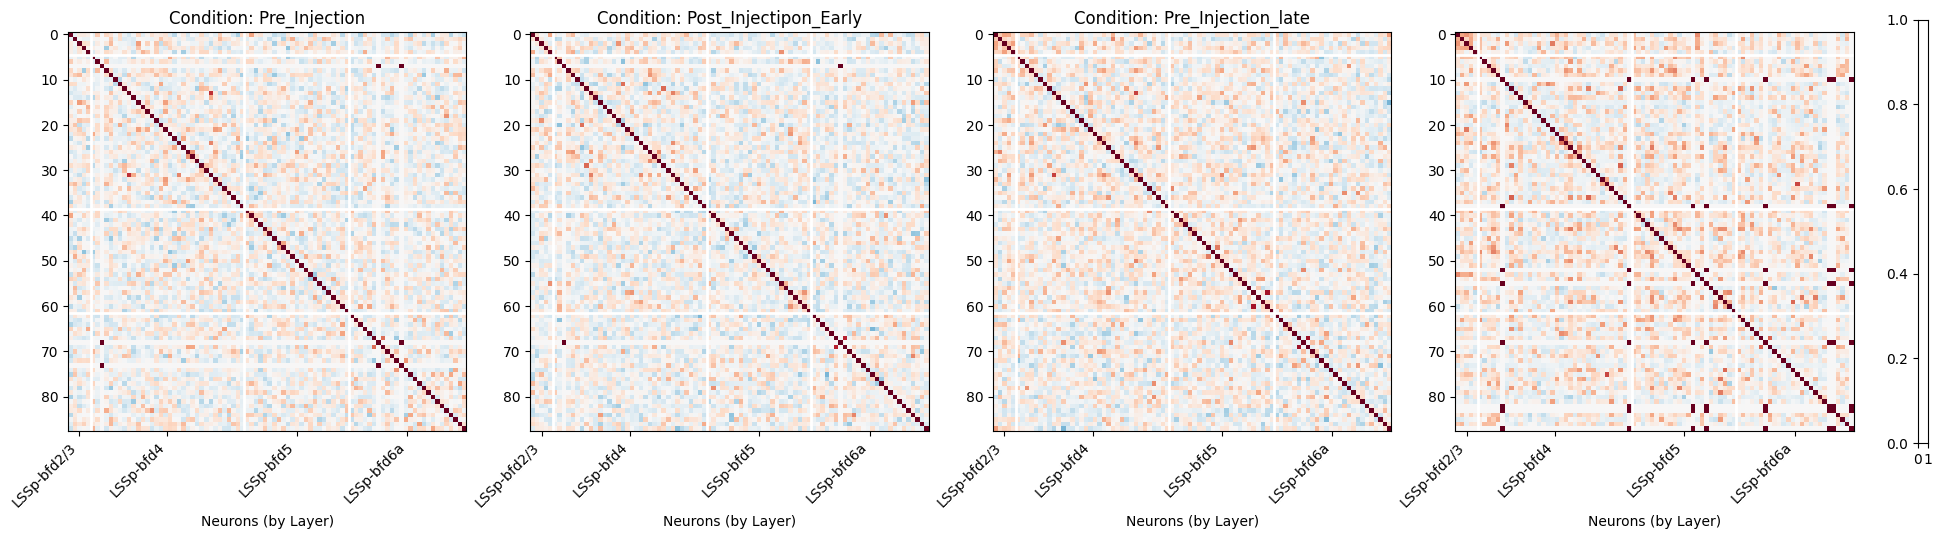

In [35]:
reg = 'SSp'
matrices = []
for vis_epoch in test_session.vis_epochs:
    fr_rates = test_session.trial_data[vis_epoch][(7777,7777,7777)]
    test_sub = sr.subset_and_organize_matrices(test_session.region_labels, test_session.layer_labels, fr_rates,reg)
    v = sr.add_epsilon(test_sub[0], epsilon=1e-7)
    correlation_matrix = np.corrcoef(v)
    matrices.append(correlation_matrix)
layer_info = test_sub[2]
unique_layers = sorted(layer_info.keys())
plu.generate_matrices_comparison(matrices,layer_info,unique_layers,epochs,title = reg)

In [ ]:
reg = ''
matrices = []
for vis_epoch in test_session.vis_epochs:
    fr_rates = test_session.trial_data[vis_epoch][(7777,7777,7777)]
    test_sub = sr.subset_and_organize_matrices(test_session.region_labels, test_session.layer_labels, fr_rates,reg)
    v = sr.add_epsilon(test_sub[0], epsilon=1e-7)
    correlation_matrix = np.corrcoef(v)
    matrices.append(correlation_matrix)
layer_info = test_sub[2]
unique_layers = sorted(layer_info.keys())
plu.generate_matrices_comparison(matrices,layer_info,unique_layers,epochs,title = reg)

In [ ]:
layers = []
for unit_idx in range(len(analysis_table)):
    spike_times = analysis_table.iloc[unit_idx]['Spontaneous_0_spikes']
    if spike_times is None or len(spike_times) == 0:
        continue
    layers.append(analysis_table.iloc[unit_idx]['layer'])
layers = np.array(layers)
fr_matrix = firing_rate_matrix_spon0.copy()
# 2. Sort neurons by layer
sorted_indices = np.argsort(layers)
sorted_layers = layers[sorted_indices]
fr_matrix_sorted = fr_matrix[sorted_indices]
# 3. Compute correlation matrix
corr_matrix = np.corrcoef(fr_matrix_sorted)
# 4. Plot
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='vlag', center=0, square=True, xticklabels=False, yticklabels=False)
plt.title("Neuron × Neuron Correlation (Grouped by Layer)", fontsize=14)
# 5. Optionally draw lines to show layer boundaries
unique_layers, counts = np.unique(sorted_layers, return_counts=True)
layer_boundaries = np.cumsum(counts)
# Draw horizontal and vertical lines to separate layers
for boundary in layer_boundaries[:-1]:
    plt.axhline(boundary, color='gray', linestyle='--', linewidth=0.5)
    plt.axvline(boundary, color='gray', linestyle='--', linewidth=0.5)
# 6. Compute tick positions (center of each group)
tick_positions = layer_boundaries - counts // 2
# :white_check_mark: Fix: Make sure tick_positions and labels match in length
assert len(tick_positions) == len(unique_layers)
# Add layer labels
plt.yticks(tick_positions, unique_layers, fontsize=10)
plt.xticks(tick_positions, unique_layers, fontsize=10, rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
# get full correlation matrics do linear mixed modeling 
# filter connections for viewing #
# need to do some modeling 

In [ ]:
titles =  [i[0] for i in test[0]]
im2plot = [i[1] for i in test[0]]
reference_array = im2plot[0]  # The array to use for determining sort order

# Get the maximum value in each row
row_max_values = np.max(reference_array, axis=1)

# Get the indices that would sort by descending order (highest first)
sort_indices = np.argsort(row_max_values)[::-1]

# Apply this ordering to all arrays
sorted_array1 = im2plot[0][sort_indices]
sorted_array2 = im2plot[1][sort_indices]
sorted_array3 = im2plot[2][sort_indices]

In [ ]:
# Sort the arrays
reference_array = im2plot[0]
first_max_indices = np.argmax(reference_array, axis=1)
sort_indices = np.argsort(first_max_indices)

# Apply sorting to all arrays
sorted_im2plot = [arr[sort_indices] for arr in im2plot]

# Visualize before and after
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

# Original stacked image
original_stacked = np.hstack(im2plot)
im1 = ax1.imshow(original_stacked, aspect='auto', cmap='viridis')
ax1.set_title('Original Arrays')

# Sorted stacked image
sorted_stacked = np.hstack(sorted_im2plot)
im2 = ax2.imshow(sorted_stacked, aspect='auto', cmap='viridis')
ax2.set_title('Sorted by First Appearance of Maximum Value')

# Calculate tick positions based on actual array shapes
if 'titles' in locals():
    for ax in [ax1, ax2]:
        tick_positions = []
        array_widths = [arr.shape[1] for arr in im2plot]  # Get width of each array
        
        current_position = 0
        for width in array_widths:
            # Place tick at center of each array
            tick_positions.append(current_position + width/2 - 0.5)
            current_position += width
        
        tick_labels = [str(title) for title in titles]
        ax.set_xticks(tick_positions, tick_labels, rotation=45, ha='right')
        
        # Add separation lines based on actual widths
        current_position = 0
        for i, width in enumerate(array_widths[:-1]):  # Don't add line after last array
            current_position += width
            ax.axvline(x=current_position - 0.5, color='white', linestyle='-', linewidth=2, alpha=0.8)

plt.colorbar(im1, ax=ax1)
plt.colorbar(im2, ax=ax2)
plt.tight_layout()
plt.show()

print(f"Rows are now ordered by column position of first max:")
print(f"Array shapes: {[arr.shape for arr in im2plot]}")
print(f"Array widths: {[arr.shape[1] for arr in im2plot]}")